In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv',low_memory=False, sep = ';')

In [5]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1010287502,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaN,"732,4","76,3","656,1","3635,5","21,46",Not found,14.02.2018,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4018720007,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaN,"164,5","109,9","54,6","102,9","1,09",Not found,14.02.2018,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1008290050,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaN,"1150,2",438,"712,3","10762,6","86,1",Not found,14.02.2018,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1008280053,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaN,"273,4","98,2","175,3","790,1","15,8",Not found,14.02.2018,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1000650024,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaN,"90,7",0,"90,7",143,"2,86",Not found,14.02.2018,Not found


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       34355 non-null  int64  
 1   Property Id                                                 34355 non-null  int64  
 2   Property Name                                               34355 non-null  object 
 3   Parent Property Id                                          1723 non-null   object 
 4   Parent Property Name                                        1723 non-null   object 
 5   BBL - 10 digits                                             33625 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              33626 non-null  object 
 7   NYC Building Identification Number (BIN)                    33123 non-null  object 
 

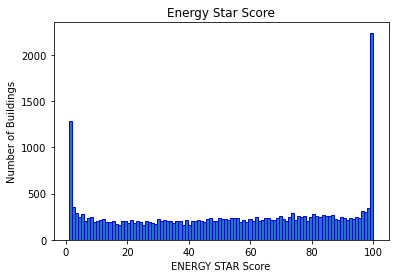

In [6]:
plt.hist(df['ENERGY STAR Score'].dropna(), bins = 100, edgecolor = 'b');
plt.xlabel('ENERGY STAR Score'); 
plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score');

In [7]:
types = df.dropna(subset=['ENERGY STAR Score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

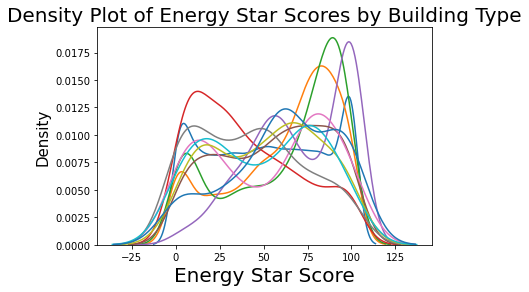

In [12]:
for b_type in types:
    subset = df[df['Largest Property Use Type'] == b_type]
    
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 15); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 20);